In [1]:
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd
import re
from traffic_analysis import (
    display_shot,
    load_config,
    maximum_measure_points,
    get_colors_from_screenshots,
)

In [2]:
URL_IMAGE = "./shots/leuven_tiensesteenweg_20231017-114236.png"

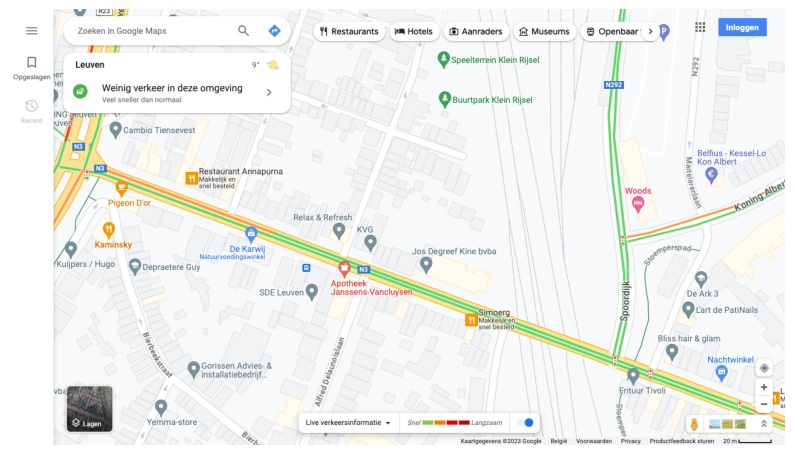

In [3]:
ax = display_shot(URL_IMAGE)
plt.show()

In [4]:
config = load_config("config.toml")

# Print the values
print(config)

{'leuven': {'geldenaaksepoort': {'url': 'https://www.google.com/maps/@50.8726718,4.7131464,18z/data=!5m1!1e1'}, 'tiensevest': {'url': 'https://www.google.com/maps/@50.8747536,4.713817,17.97z/data=!5m1!1e1'}, 'tiensesteenweg': {'url': 'https://www.google.com/maps/@50.8733218,4.7172716,18z/data=!5m1!1e1', 'points': [[164, 268], [187, 276], [207, 283], [225, 290], [247, 299], [270, 307], [290, 315], [314, 324], [341, 334], [368, 344], [395, 354], [421, 364], [448, 374], [473, 383], [500, 394], [530, 405], [603, 432], [625, 441], [647, 449], [675, 458], [699, 467], [728, 478], [761, 490], [849, 522], [879, 534], [904, 543], [928, 552], [953, 561], [983, 572], [1028, 589], [1082, 607], [1123, 623], [1163, 638], [1194, 649]]}, 'tiensestraat': {'url': 'https://www.google.com/maps/@50.8748008,4.7106216,17z/data=!5m1!1e1'}}}


In [5]:
streets = list(config["leuven"].keys())
streets

['geldenaaksepoort', 'tiensevest', 'tiensesteenweg', 'tiensestraat']

# Code to display four shots in a quadrant

In [6]:
mosaic = [[streets[3], streets[0]], [streets[1], streets[2]]]

In [7]:
plt.rc("axes.spines", top=False, right=False)

In [8]:
URL_IMAGE_DIR = "shots"
url_image_dir = Path(URL_IMAGE_DIR)
assert url_image_dir.exists()
location = "leuven"

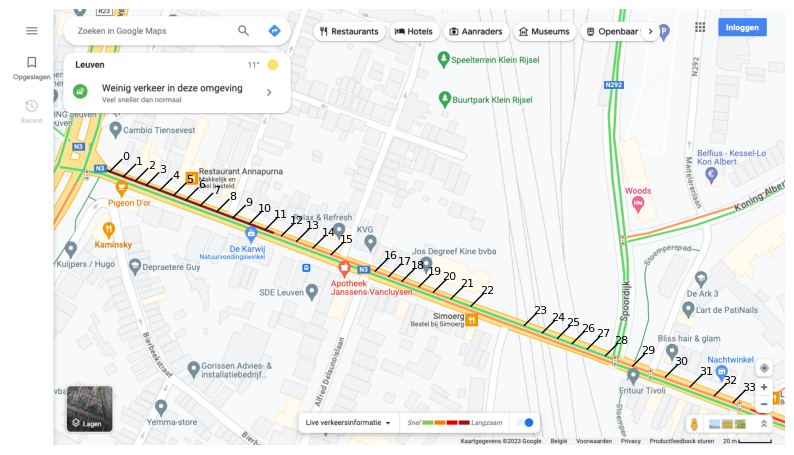

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
location = "leuven"
street = "tiensesteenweg"

text_offset = 6
line_offset = 20

street_offsets = {
    "tiensestraat": [
        -line_offset,
        line_offset,
        -text_offset,
        text_offset,
        "center",
        "center",
    ],
    "tiensevest": [
        -line_offset,
        -line_offset,
        -text_offset,
        -text_offset,
        "center",
        "center",
    ],
    "geldenaaksepoort": [
        line_offset,
        line_offset,
        text_offset,
        text_offset,
        "center",
        "center",
    ],
    "tiensesteenweg": [
        line_offset,
        -line_offset,
        text_offset,
        -text_offset,
        "center",
        "center",
    ],
}

img_url_path = next(url_image_dir.glob(f"{location}_{street}_*.png"))
im = cv2.cvtColor(cv2.imread(img_url_path.as_posix()), cv2.COLOR_BGR2RGB)
ax.spines[:].set_visible(False)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.imshow(im)
for i, p in enumerate(config[location][street]["points"]):
    x, y = p[0], p[1]
    x_end, y_end = x + street_offsets[street][0], y + street_offsets[street][1]
    ax.plot([x, x_end], [y, y_end], color="k", linewidth=1)
    ax.annotate(
        f"{i}",
        xy=(x_end, y_end),
        xytext=(x_end + street_offsets[street][2], y_end + street_offsets[street][3]),
        fontsize=8,
        ha=street_offsets[street][4],
        va=street_offsets[street][5],
    )
plt.savefig(
    "meetpunten_leuven_tiensesteenweg.png",  # Set path and filename
    dpi=300,  # Set dots per inch
    bbox_inches="tight",  # Remove extra whitespace around plot
    facecolor="white",
)  # Set background color to white

In [10]:
max_points, max_location, max_street = maximum_measure_points(config)
print(
    f"Maximum number of measurement points is {max_points} in {max_street} in {location}"
)

Maximum number of measurement points is 34 in tiensesteenweg in leuven


# Walk over screenshots and sample pixel colors

In [11]:
df = get_colors_from_screenshots(config, url_image_dir)

df.head()

,location,street,path,timestamp,color_0,p0_red,p0_green,p0_blue,color_1,p1_red,...,traffic_color_24,traffic_color_25,traffic_color_26,traffic_color_27,traffic_color_28,traffic_color_29,traffic_color_30,traffic_color_31,traffic_color_32,traffic_color_33
10,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114236.png,2023-10-17 11:42:36,"[255, 151, 77]",255,151,77,"[255, 151, 77]",255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114540.png,2023-10-17 11:45:40,"[255, 151, 77]",255,151,77,"[255, 151, 77]",255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-115051.png,2023-10-17 11:50:51,"[255, 151, 77]",255,151,77,"[255, 151, 77]",255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-115602.png,2023-10-17 11:56:02,"[255, 151, 77]",255,151,77,"[255, 151, 77]",255,...,NaN,NaN,NaN,NaN,NaN,orange,NaN,orange,orange,orange
34,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-120113.png,2023-10-17 12:01:13,"[255, 151, 77]",255,151,77,"[255, 151, 77]",255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.tail()

,location,street,path,timestamp,color_0,p0_red,p0_green,p0_blue,color_1,p1_red,...,traffic_color_24,traffic_color_25,traffic_color_26,traffic_color_27,traffic_color_28,traffic_color_29,traffic_color_30,traffic_color_31,traffic_color_32,traffic_color_33
30,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-174637.png,2023-10-17 17:46:37,"[242, 60, 50]",242,60,50,"[242, 60, 50]",242,...,NaN,NaN,NaN,NaN,NaN,orange,NaN,orange,orange,orange
21,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-175148.png,2023-10-17 17:51:48,"[242, 60, 50]",242,60,50,"[242, 60, 50]",242,...,NaN,NaN,NaN,NaN,NaN,red,NaN,red,red,red
36,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-175659.png,2023-10-17 17:56:59,"[242, 60, 50]",242,60,50,"[242, 60, 50]",242,...,NaN,NaN,NaN,NaN,NaN,orange,NaN,orange,orange,orange
27,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,2023-10-17 18:02:10,"[242, 60, 50]",242,60,50,"[242, 60, 50]",242,...,NaN,NaN,NaN,NaN,NaN,orange,NaN,orange,orange,orange
9,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180722.png,2023-10-17 18:07:22,"[242, 60, 50]",242,60,50,"[242, 60, 50]",242,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Inspect the dataframe

In [13]:
df["color_0"].astype(str).unique()

array(['[255 151  77]', '[253 226 147]', '[129  31  31]', '[242  60  50]'],
      dtype=object)

In [14]:
df["color_0"].astype(str).value_counts()

color_0
[129  31  31]    19
[255 151  77]    11
[242  60  50]     7
[253 226 147]     2
Name: count, dtype: int64

## Display all colors that are found in the dataframe at a certain point

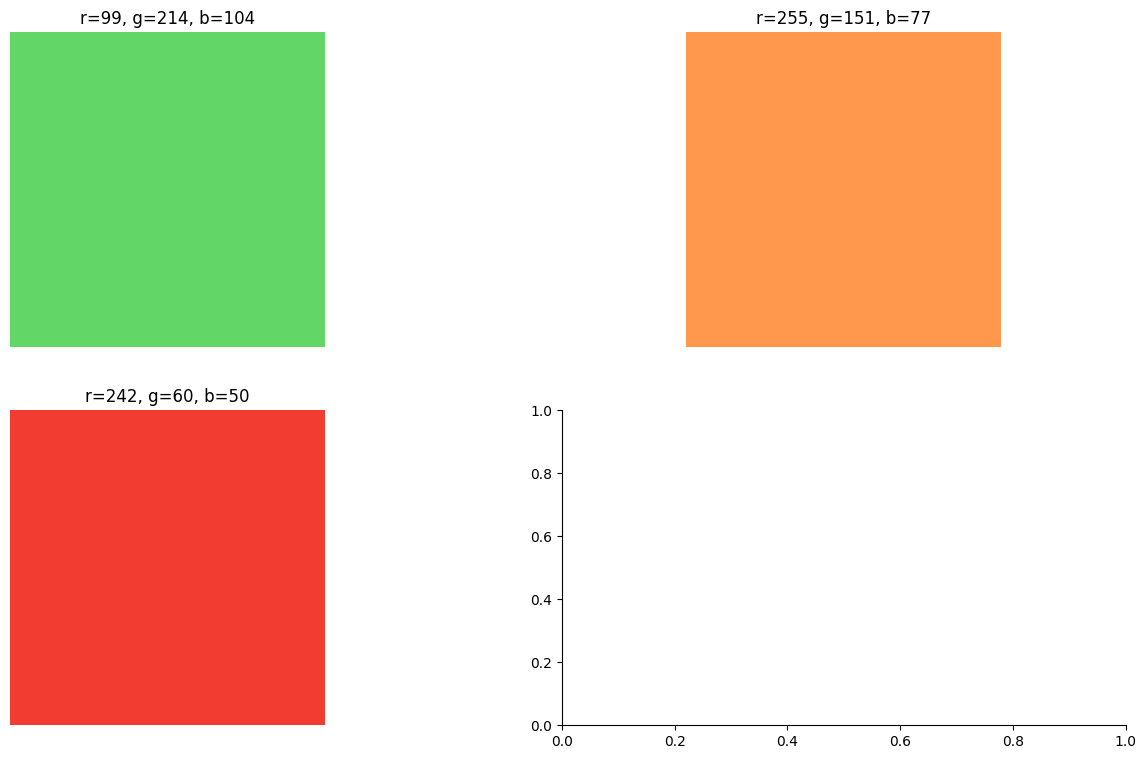

In [15]:
fig, axd = plt.subplot_mosaic(
    mosaic, gridspec_kw={"width_ratios": [1, 1], "wspace": 0.2}, figsize=(16, 9)
)
colors_in_measure_point = "color_13"
number_of_colors = df[colors_in_measure_point].astype(str).nunique()
assert number_of_colors < len(
    fig.axes
), "Increase the number of axis {len(fig.axes)} to at least {number_of_colors=}"
for idx, (color, ax) in enumerate(
    zip(df[colors_in_measure_point].astype(str).unique(), fig.axes)
):
    parts = " ".join(color.split()).split(" ")
    numbers = re.findall(r"\d+", color)
    # print (numbers[0], numbers[1], numbers[2])
    r = int(numbers[0])
    g = int(numbers[1])
    b = int(numbers[2])
    ax.set_axis_off()
    if idx < number_of_colors:
        ax.imshow([[(r, g, b)]])
        ax.set_title(f"{r=}, {g=}, {b=}")

# Analyse/resample the data and make plot

In [16]:
df = df.sort_values(by="timestamp").reset_index(drop=True).copy()

In [17]:
df["street"].shape

(39,)

In [18]:
df_resampled = df.set_index("timestamp").resample("1Min").ffill()

In [19]:
df_resampled

,location,street,path,color_0,p0_red,p0_green,p0_blue,color_1,p1_red,p1_green,...,traffic_color_24,traffic_color_25,traffic_color_26,traffic_color_27,traffic_color_28,traffic_color_29,traffic_color_30,traffic_color_31,traffic_color_32,traffic_color_33
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-10-17 11:42:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-17 11:43:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114236.png,"[255, 151, 77]",255.0,151.0,77.0,"[255, 151, 77]",255.0,151.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-17 11:44:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114236.png,"[255, 151, 77]",255.0,151.0,77.0,"[255, 151, 77]",255.0,151.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-17 11:45:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114236.png,"[255, 151, 77]",255.0,151.0,77.0,"[255, 151, 77]",255.0,151.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-17 11:46:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114540.png,"[255, 151, 77]",255.0,151.0,77.0,"[255, 151, 77]",255.0,151.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-17 18:03:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[242, 60, 50]",242.0,60.0,50.0,"[242, 60, 50]",242.0,60.0,...,NaN,NaN,NaN,NaN,NaN,orange,NaN,orange,orange,orange
2023-10-17 18:04:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[242, 60, 50]",242.0,60.0,50.0,"[242, 60, 50]",242.0,60.0,...,NaN,NaN,NaN,NaN,NaN,orange,NaN,orange,orange,orange
2023-10-17 18:05:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[242, 60, 50]",242.0,60.0,50.0,"[242, 60, 50]",242.0,60.0,...,NaN,NaN,NaN,NaN,NaN,orange,NaN,orange,orange,orange


In [20]:
df_resampled = df_resampled.reset_index().iloc[1:].set_index("timestamp")
df_resampled.head()

,location,street,path,color_0,p0_red,p0_green,p0_blue,color_1,p1_red,p1_green,...,traffic_color_24,traffic_color_25,traffic_color_26,traffic_color_27,traffic_color_28,traffic_color_29,traffic_color_30,traffic_color_31,traffic_color_32,traffic_color_33
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-10-17 11:43:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114236.png,"[255, 151, 77]",255.0,151.0,77.0,"[255, 151, 77]",255.0,151.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-17 11:44:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114236.png,"[255, 151, 77]",255.0,151.0,77.0,"[255, 151, 77]",255.0,151.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-17 11:45:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114236.png,"[255, 151, 77]",255.0,151.0,77.0,"[255, 151, 77]",255.0,151.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-17 11:46:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114540.png,"[255, 151, 77]",255.0,151.0,77.0,"[255, 151, 77]",255.0,151.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-17 11:47:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114540.png,"[255, 151, 77]",255.0,151.0,77.0,"[255, 151, 77]",255.0,151.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analyse tiensesteenweg

In [21]:
df_street = df_resampled.query("(street == 'tiensesteenweg')")
df_street = df_street[df_street.index > "2023-10-17 15:29:00"]

In [22]:
df_street

,location,street,path,color_0,p0_red,p0_green,p0_blue,color_1,p1_red,p1_green,...,traffic_color_24,traffic_color_25,traffic_color_26,traffic_color_27,traffic_color_28,traffic_color_29,traffic_color_30,traffic_color_31,traffic_color_32,traffic_color_33
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-10-17 15:30:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-125500.png,"[129, 31, 31]",129.0,31.0,31.0,"[129, 31, 31]",129.0,31.0,...,NaN,NaN,NaN,NaN,NaN,orange,NaN,orange,orange,orange
2023-10-17 15:31:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-125500.png,"[129, 31, 31]",129.0,31.0,31.0,"[129, 31, 31]",129.0,31.0,...,NaN,NaN,NaN,NaN,NaN,orange,NaN,orange,orange,orange
2023-10-17 15:32:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-125500.png,"[129, 31, 31]",129.0,31.0,31.0,"[129, 31, 31]",129.0,31.0,...,NaN,NaN,NaN,NaN,NaN,orange,NaN,orange,orange,orange
2023-10-17 15:33:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-125500.png,"[129, 31, 31]",129.0,31.0,31.0,"[129, 31, 31]",129.0,31.0,...,NaN,NaN,NaN,NaN,NaN,orange,NaN,orange,orange,orange
2023-10-17 15:34:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-125500.png,"[129, 31, 31]",129.0,31.0,31.0,"[129, 31, 31]",129.0,31.0,...,NaN,NaN,NaN,NaN,NaN,orange,NaN,orange,orange,orange
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-17 18:03:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[242, 60, 50]",242.0,60.0,50.0,"[242, 60, 50]",242.0,60.0,...,NaN,NaN,NaN,NaN,NaN,orange,NaN,orange,orange,orange
2023-10-17 18:04:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[242, 60, 50]",242.0,60.0,50.0,"[242, 60, 50]",242.0,60.0,...,NaN,NaN,NaN,NaN,NaN,orange,NaN,orange,orange,orange
2023-10-17 18:05:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[242, 60, 50]",242.0,60.0,50.0,"[242, 60, 50]",242.0,60.0,...,NaN,NaN,NaN,NaN,NaN,orange,NaN,orange,orange,orange


### Ascii bar plot

In [23]:
# All column names
# ",".join(df_street.columns)

In [24]:
print_map = {"darkred": "*", "red": "x", "orange": "-", "green": "."}

In [25]:
df_street["traffic_color_19"].unique()

array(['red', 'orange', nan], dtype=object)

In [26]:
for idx, row in df_street.iterrows():
    print(idx, end="")
    for i in range(34):
        symbol = print_map.get(row[f"traffic_color_{i}"], ".")
        print(symbol, end="")
    print("\n")

2023-10-17 15:30:00************xxxxxxxxx........-.---

2023-10-17 15:31:00************xxxxxxxxx........-.---

2023-10-17 15:32:00************xxxxxxxxx........-.---

2023-10-17 15:33:00************xxxxxxxxx........-.---

2023-10-17 15:34:00************xxxxxxxxx........-.---

2023-10-17 15:35:00************xxxxxxxxx........-.---

2023-10-17 15:36:00************xxxxxxxxx........-.---

2023-10-17 15:37:00************xxxxxxxxx........-.---

2023-10-17 15:38:00************xxxxxxxxx........-.---

2023-10-17 15:39:00************xxxxxxxxx........-.---

2023-10-17 15:40:00************xxxxxxxxx........-.---

2023-10-17 15:41:00************xxxxxxxxx........-.---

2023-10-17 15:42:00************xxxxxxxxx........-.---

2023-10-17 15:43:00************xxxxxxxxx--------.....

2023-10-17 15:44:00************xxxxxxxxx--------.....

2023-10-17 15:45:00************xxxxxxxxx--------.....

2023-10-17 15:46:00************xxxxxxxxx--------.....

2023-10-17 15:47:00************xxxxxxxxx--------.....

2023-10-17

### matplotlib

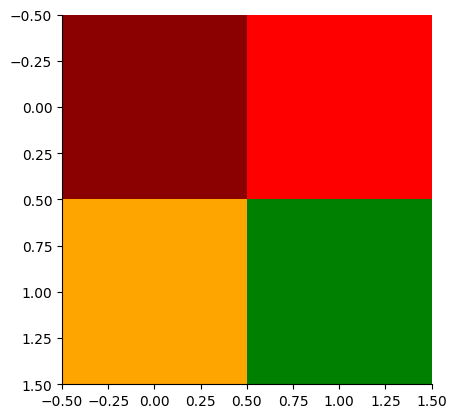

In [27]:
from matplotlib.colors import LinearSegmentedColormap

colors = ["darkred", "red", "orange", "green"]
cmap = LinearSegmentedColormap.from_list("my_cmap", colors)

plt.imshow([[0, 1], [2, 3]], cmap=cmap)
plt.show()

In [28]:
df_street.shape

(158, 173)

In [29]:
color_columns = [f"traffic_color_{i}" for i in range(34)]
color2index = {"darkred": 0, "red": 1, "orange": 2, "green": 3}
index_columns = []
for idx, colom in enumerate(color_columns):
    df_street[f"index_color_{idx}"] = df_street[colom].map(color2index)
    index_columns.append(f"index_color_{idx}")
traffic_color_matrix = df_street[index_columns].fillna(3).to_numpy()
traffic_color_matrix

/var/folders/l3/cl401yld1x3f35c0g3sbm3b80000gp/T/ipykernel_26088/2116354483.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_street[f"index_color_{idx}"] = df_street[colom].map(color2index)
/var/folders/l3/cl401yld1x3f35c0g3sbm3b80000gp/T/ipykernel_26088/2116354483.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_street[f"index_color_{idx}"] = df_street[colom].map(color2index)
/var/folders/l3/cl401yld1x3f35c0g3sbm3b80000gp/T/ipykernel_26088/2116354483.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is

array([[0., 0., 0., ..., 2., 2., 2.],
       [0., 0., 0., ..., 2., 2., 2.],
       [0., 0., 0., ..., 2., 2., 2.],
       ...,
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.]])

In [30]:
traffic_color_matrix.shape

(158, 34)

In [31]:
from matplotlib.text import Text
import matplotlib.dates as mdates

In [32]:
time = df_street.index

In [33]:
traffic_color_matrix.shape

(158, 34)

/var/folders/l3/cl401yld1x3f35c0g3sbm3b80000gp/T/ipykernel_26088/542747038.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xlabels)


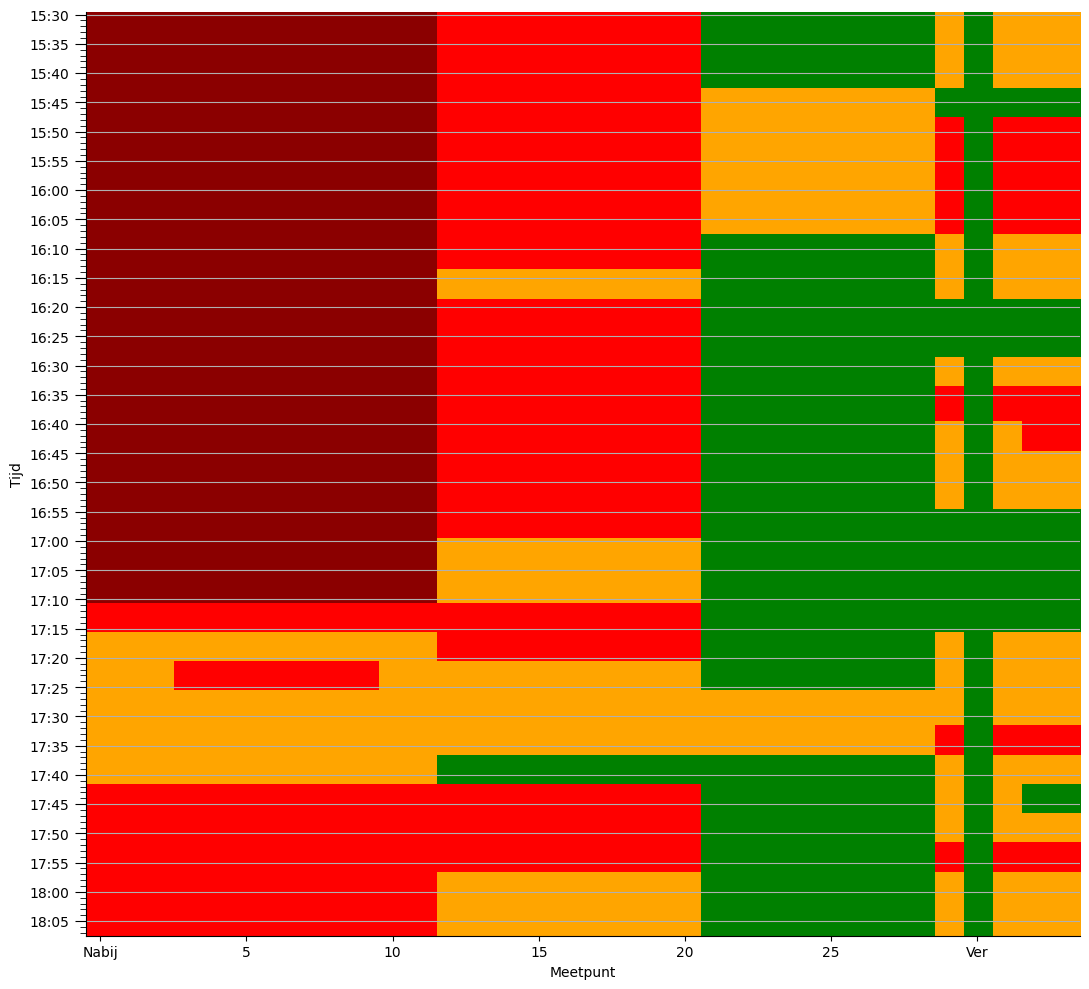

In [34]:
fig, ax = plt.subplots(figsize=(16, 12))
# plt.figure().set_figheight(1)
# plt.figure().set_figwidth(10)

# plt.axis('off');
ax.set_xlabel("Meetpunt")
ax.set_ylabel("Tijd")
# ax.set_xticks([]);
# ax.set_yticks([]);


# # Calculate the number of minutes between each tick
# minutes_per_tick = 1

# # Calculate the total number of ticks based on the number of rows
# num_ticks = len(traffic_color_matrix)

# # Create an array of tick locations
# tick_locations = np.arange(0, num_ticks, minutes_per_tick)

# Create an array of tick labels (assuming they are in minutes)
# tick_labels = [str(i * minutes_per_tick) for i in range(len(tick_locations))]
ticks = df_street.index
tick_labels = [
    f"{tick:%H:%M}" if idx % 5 == 0 else "" for idx, tick in enumerate(ticks)
]
major_tick_labels = [f"{tick:%H:%M}" for idx, tick in enumerate(ticks) if idx % 5 == 0]

# Plot the matrix using imshow on the specified axis
ax.imshow(traffic_color_matrix, cmap=cmap, aspect=0.2)

# Set y-axis tick locations and labels
ax.set_yticks(list(range(df_street.shape[0])), minor=True)
ax.set_yticks(list(range(0, df_street.shape[0], 5)), minor=False)
ax.set_yticklabels(major_tick_labels, minor=False)

# # Remove values for minor tick labels
# minor_labels = ['' for _ in ax.get_yticks(minor=True)]
# ax.set_yticklabels(minor_labels, minor=True)

# # Set the major locator and formatter for y-axis
# ax.yaxis.set_major_locator(mdates.MinuteLocator(interval=5))  # Set major ticks every 5 minutes
# ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format major ticks as HH:MM

# Set the minor locator and formatter for y-axis
# ax.yaxis.set_minor_locator(mdates.MinuteLocator(interval=1))  # Set minor ticks every 1 minute
# ax.yaxis.set_minor_formatter(mdates.DateFormatter('%M'))  # Format minor ticks as minutes


# Customize tick parameters to make major ticks longer
ax.tick_params(axis="y", which="major", size=8)  # Adjust the size as needed
ax.tick_params(axis="y", which="minor", size=4)

# Add gridlines for the y-axis at major y-tick positions
ax.yaxis.grid(True, which="major")

# Hide gridlines for the x-axis
ax.xaxis.grid(False)

# # Remove y-labels for the minor ticks
# ax.set_yticklabels([], minor=True)

# # Set the x-axis major locator to every 15 minutes
# ax.yaxis.set_major_locator(mdates.MinuteLocator(interval=15))
# # Format the x-axis major ticks as hours and minutes
# ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ylabels = ax.get_yticklabels()
# for idx, label in enumerate(ylabels):
#     ylabels[idx].set_text('')
#     if idx == 1:
#         ylabels[1].set_text('16u')
#     if idx == len(ylabels)-2:
#         ylabels[-2].set_text('18u')
# ax.set_yticklabels(ylabels);
xlabels = ax.get_xticklabels()
for idx, label in enumerate(xlabels):
    # xlabels[idx].set_text('')
    if idx == 1:
        xlabels[1].set_text("Nabij")
    if idx == len(xlabels) - 1:
        xlabels[-2].set_text("Ver")
ax.set_xticklabels(xlabels)


plt.savefig(
    "leuven_tiensesteenweg_231017_16u_18u.png",  # Set path and filename
    dpi=300,  # Set dots per inch
    bbox_inches="tight",  # Remove extra whitespace around plot
    facecolor="white",
)  # Set background color to white

In [35]:
df_street

,location,street,path,color_0,p0_red,p0_green,p0_blue,color_1,p1_red,p1_green,...,index_color_24,index_color_25,index_color_26,index_color_27,index_color_28,index_color_29,index_color_30,index_color_31,index_color_32,index_color_33
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-10-17 15:30:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-125500.png,"[129, 31, 31]",129.0,31.0,31.0,"[129, 31, 31]",129.0,31.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0
2023-10-17 15:31:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-125500.png,"[129, 31, 31]",129.0,31.0,31.0,"[129, 31, 31]",129.0,31.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0
2023-10-17 15:32:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-125500.png,"[129, 31, 31]",129.0,31.0,31.0,"[129, 31, 31]",129.0,31.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0
2023-10-17 15:33:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-125500.png,"[129, 31, 31]",129.0,31.0,31.0,"[129, 31, 31]",129.0,31.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0
2023-10-17 15:34:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-125500.png,"[129, 31, 31]",129.0,31.0,31.0,"[129, 31, 31]",129.0,31.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-17 18:03:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[242, 60, 50]",242.0,60.0,50.0,"[242, 60, 50]",242.0,60.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0
2023-10-17 18:04:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[242, 60, 50]",242.0,60.0,50.0,"[242, 60, 50]",242.0,60.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0
2023-10-17 18:05:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[242, 60, 50]",242.0,60.0,50.0,"[242, 60, 50]",242.0,60.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0
